In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_tweet=pd.DataFrame(columns=['date','tweet'])
for tweet_year in range(2020,2023):
  file_path = '/drive.google.com/drive/folders/1OypSak8TCXtvTQVPD4liIYSrnt7iHPdt?usp=share_link
' + str(tweet_year)+ '.csv'
  df = pd.read_csv(file_path)
  df= df[['date','tweet']]

  df_tweet=pd.concat([df_tweet,df])
df_tweet

SyntaxError: ignored

In [ ]:
df_tweet['year'] = pd.DatetimeIndex(df_tweet['date']).year
df_tweet

,date,tweet,year
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,2020
1,2020-12-28 18:07:33,@kimpaquette Just meeting with Larry Ellison t...,2020
2,2020-12-28 17:23:51,@richierichhhhh_ Absolutely,2020
3,2020-12-28 17:23:31,What should Tesla do with in-car gaming in an ...,2020
4,2020-12-28 05:39:42,@PPathole @WSJ Absolutely,2020
...,...,...,...
1023,2022-01-03,https://t.co/LA9hPzVlGx,2022
1024,2022-01-02,Let’s make the roaring 20’s happen!,2022
1025,2022-01-02,Great work by Tesla team worldwide!,2022
1026,2022-01-01,@BLKMDL3 @Tesla 🔥,2022


In [ ]:
df_tweet_dup = df_tweet.copy()

In [ ]:
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].replace(regex='(@\w+)|#|&|!',value='') # Remove mentions and hashtags
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip() # removing urls from tweet column
df_tweet_dup = df_tweet_dup.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) # Removing emojis from the dataframe
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace("[^a-zA-Z#]", " ") #Removing Punctuations, Special Charecters, Numbers
df_tweet_dup

<ipython-input-12-39a7d4c94820>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip() # removing urls from tweet column
<ipython-input-12-39a7d4c94820>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace("[^a-zA-Z#]", " ") #Removing Punctuations, Special Charecters, Numbers


,date,tweet,year
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,2020
1,2020-12-28 18:07:33,Just meeting with Larry Ellison to seek some a...,2020
2,2020-12-28 17:23:51,Absolutely,2020
3,2020-12-28 17:23:31,What should Tesla do with in car gaming in an ...,2020
4,2020-12-28 05:39:42,Absolutely,2020
...,...,...,...
1023,2022-01-03,,2022
1024,2022-01-02,Lets make the roaring s happen,2022
1025,2022-01-02,Great work by Tesla team worldwide,2022
1026,2022-01-01,,2022


In [ ]:
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].replace(r'^s*$', float('NaN'), regex = True) # Dropping the NA Values
df_tweet_dup.dropna(subset=['tweet'], inplace=True)
df_tweet_dup

,date,tweet,year
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,2020
1,2020-12-28 18:07:33,Just meeting with Larry Ellison to seek some a...,2020
2,2020-12-28 17:23:51,Absolutely,2020
3,2020-12-28 17:23:31,What should Tesla do with in car gaming in an ...,2020
4,2020-12-28 05:39:42,Absolutely,2020
...,...,...,...
1020,2022-01-03,Reminds me of when I hex edited Ultima V to ge...,2022
1021,2022-01-03,Yay Switzerland,2022
1022,2022-01-03,There is no way to be in touch with voters whe...,2022
1024,2022-01-02,Lets make the roaring s happen,2022


# 1) Compute word frequencies for each year. Exclude the stop words


In [ ]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop = stopwords.words('english')
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word.lower() not in stop))  ## For excluding stop words

# To tokenize the filtered tweets after removing the stop words
from nltk.tokenize import word_tokenize
nltk.download('punkt')
word_tokens = df_tweet_dup['tweet'].apply(word_tokenize)
df_tweet_dup['tweet'] = word_tokens

df_tweet_dup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,tweet,year
0,2020-12-28 19:46:18,"[entertainment, critical, cars, drive]",2020
1,2020-12-28 18:07:33,"[meeting, larry, ellison, seek, advice, back, ...",2020
2,2020-12-28 17:23:51,[absolutely],2020
3,2020-12-28 17:23:31,"[tesla, car, gaming, autonomous, world]",2020
4,2020-12-28 05:39:42,[absolutely],2020
...,...,...,...
1020,2022-01-03,"[reminds, hex, edited, ultima, v, get, final, ...",2022
1021,2022-01-03,"[yay, switzerland]",2022
1022,2022-01-03,"[way, touch, voters, youre, three, generations...",2022
1024,2022-01-02,"[lets, make, roaring, happen]",2022


In [ ]:
df_tweet_dup['year'].unique()  # We can see here that the data consists of tweets from 2010-2022

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2021', '2022'], dtype=object)

In [ ]:
df_tweet_dup = df_tweet_dup.drop(df_tweet_dup[df_tweet_dup.year < '2017'].index)
df_tweet_dup
# Dropping all the values of the years less than 2017 to analyse the tweets between 2017-2022

,date,tweet,year
0,2020-12-28 19:46:18,"[entertainment, critical, cars, drive]",2020
1,2020-12-28 18:07:33,"[meeting, larry, ellison, seek, advice, back, ...",2020
2,2020-12-28 17:23:51,[absolutely],2020
3,2020-12-28 17:23:31,"[tesla, car, gaming, autonomous, world]",2020
4,2020-12-28 05:39:42,[absolutely],2020
...,...,...,...
1020,2022-01-03,"[reminds, hex, edited, ultima, v, get, final, ...",2022
1021,2022-01-03,"[yay, switzerland]",2022
1022,2022-01-03,"[way, touch, voters, youre, three, generations...",2022
1024,2022-01-02,"[lets, make, roaring, happen]",2022


In [ ]:
df_tweet_dup['year'].unique()

array(['2020', '2019', '2018', '2017', '2021', '2022'], dtype=object)

In [ ]:
# df_tweet_dup['year'] = df_tweet_dup['year'].astype(int) # Converting the Year to int

In [ ]:
df_2017 = df_tweet_dup.loc[df_tweet_dup['year'] == '2017']
df_2018 = df_tweet_dup.loc[df_tweet_dup['year'] == '2018']
df_2019 = df_tweet_dup.loc[df_tweet_dup['year'] == '2019']
df_2020 = df_tweet_dup.loc[df_tweet_dup['year'] == '2020']
df_2021 = df_tweet_dup.loc[df_tweet_dup['year'] == '2021']
df_2022 = df_tweet_dup.loc[df_tweet_dup['year'] == '2022']
#Separating all the data per individual year

# 2) Show top 10 words (for each year) by the highest value of word frequency


Word count for tweets of 2017 - 2022 and top 10 Values

In [ ]:
dict_2017 = {}
for i in df_2017['tweet']:
  for j in i:
    if dict_2017.get(j,0) == 0:
      dict_2017[j]=1
    else:
      dict_2017[j]=dict_2017[j]+1

#dict_2017
freq_2017 = pd.DataFrame.from_dict(dict_2017,orient ='index')
freq_2017.columns = ['Count']
freq_2017 = freq_2017.sort_values(by='Count', ascending = False)
freq_2017.reset_index(inplace=True)
f_2017 = freq_2017.head(10)
f_2017

,index,Count
0,amp,86
1,tesla,74
2,model,59
3,yes,54
4,good,53
5,like,49
6,one,46
7,next,43
8,first,43
9,yeah,39


In [ ]:
dict_2018 = {}
for i in df_2018['tweet']:
  for j in i:
    if dict_2018.get(j,0) == 0:
      dict_2018[j]=1
    else:
      dict_2018[j]=dict_2018[j]+1

#dict_2018
freq_2018 = pd.DataFrame.from_dict(dict_2018,orient ='index')
freq_2018.columns = ['Count']
freq_2018 = freq_2018.sort_values(by='Count', ascending = False)
freq_2018.reset_index(inplace=True)
#freq_2018
f_2018 = freq_2018.head(10)
f_2018

,index,Count
0,amp,525
1,tesla,290
2,car,120
3,yes,108
4,good,103
5,model,98
6,like,95
7,would,76
8,dont,74
9,people,73


In [ ]:
dict_2019 = {}
for i in df_2019['tweet']:
  for j in i:
    if dict_2019.get(j,0) == 0:
      dict_2019[j]=1
    else:
      dict_2019[j]=dict_2019[j]+1

#dict_2019
freq_2019 = pd.DataFrame.from_dict(dict_2019,orient ='index')
freq_2019.columns = ['Count']
freq_2019 = freq_2019.sort_values(by='Count', ascending = False)
freq_2019.reset_index(inplace=True)
#freq_2019
f_2019 = freq_2019.head(10)
f_2019

,index,Count
0,amp,493
1,tesla,257
2,yes,154
3,would,98
4,great,97
5,starship,94
6,like,87
7,good,85
8,high,75
9,much,75


In [ ]:
dict_2020 = {}
for i in df_2020['tweet']:
  for j in i:
    if dict_2020.get(j,0) == 0:
      dict_2020[j]=1
    else:
      dict_2020[j]=dict_2020[j]+1

#dict_2020
freq_2020 = pd.DataFrame.from_dict(dict_2020,orient ='index')
freq_2020.columns = ['Count']
freq_2020 = freq_2020.sort_values(by='Count', ascending = False)
freq_2020.reset_index(inplace=True)
#freq_2020
f_2020 = freq_2020.head(10)
f_2020

,index,Count
0,amp,575
1,tesla,189
2,yes,160
3,great,128
4,much,120
5,good,112
6,would,92
7,high,91
8,sure,88
9,yeah,83


In [ ]:
dict_2021 = {}
for i in df_2021['tweet']:
  for j in i:
    if dict_2021.get(j,0) == 0:
      dict_2021[j]=1
    else:
      dict_2021[j]=dict_2021[j]+1

#dict_2021
freq_2021 = pd.DataFrame.from_dict(dict_2021,orient ='index')
freq_2021.columns = ['Count']
freq_2021 = freq_2021.sort_values(by='Count', ascending = False)
freq_2021.reset_index(inplace=True)
#freq_2021
f_2021 = freq_2021.head(10)
f_2021

,index,Count
0,amp,473
1,tesla,208
2,great,102
3,good,98
4,much,93
5,haha,89
6,like,89
7,would,88
8,time,86
9,beta,77


In [ ]:
dict_2022 = {}
for i in df_2022['tweet']:
  for j in i:
    if dict_2022.get(j,0) == 0:
      dict_2022[j]=1
    else:
      dict_2022[j]=dict_2022[j]+1

#dict_2022
freq_2022 = pd.DataFrame.from_dict(dict_2022,orient ='index')
freq_2022.columns = ['Count']
freq_2022 = freq_2022.sort_values(by='Count', ascending = False)
freq_2022.reset_index(inplace=True)
#freq_2022
f_2022 = freq_2022.head(10)
f_2022

,index,Count
0,amp,80
1,tesla,62
2,people,34
3,yes,32
4,one,30
5,would,30
6,starlink,28
7,good,28
8,car,26
9,high,22


# 3) Plot histogram of word frequencies for each year

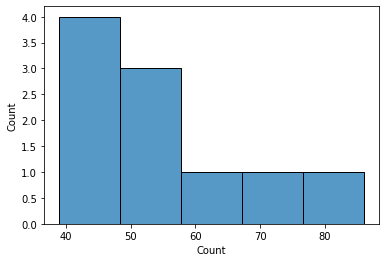

In [ ]:
import seaborn as sns
sns.histplot(data = f_2017, x= 'Count')

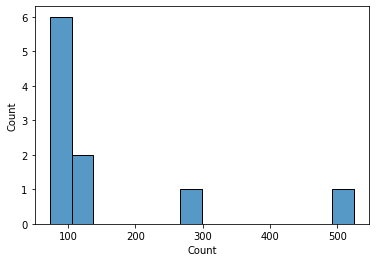

In [ ]:
import seaborn as sns
sns.histplot(data = f_2018, x= 'Count')

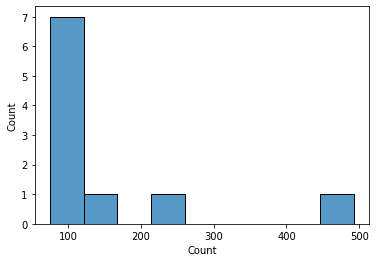

In [ ]:
import seaborn as sns
sns.histplot(data = f_2019, x= 'Count')

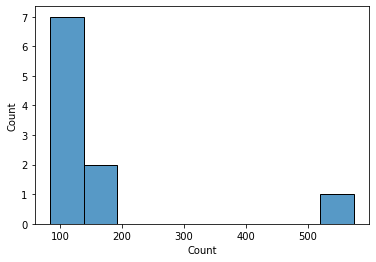

In [ ]:
import seaborn as sns
sns.histplot(data = f_2020, x= 'Count')

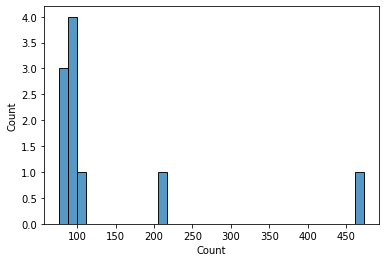

In [ ]:
import seaborn as sns
sns.histplot(data = f_2021, x= 'Count')

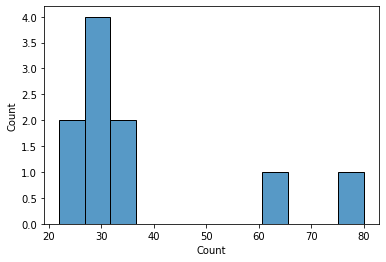

In [ ]:
import seaborn as sns
sns.histplot(data = f_2022, x= 'Count')

# 4) Use Zipf’s law and plot log-log plots of word frequencies and rank for each year


Zips's law = (Count of a word)/(Count of all words in that year)

           index  Count  Zipf law  Rank
0            amp     86  0.010249   1.0
1          tesla     74  0.008819   2.0
2          model     59  0.007031   3.0
3            yes     54  0.006435   4.0
4           good     53  0.006316   5.0
...          ...    ...       ...   ...
3072      blocks      1  0.000119  44.0
3073       favor      1  0.000119  44.0
3074  appetizing      1  0.000119  44.0
3075      looked      1  0.000119  44.0
3076      firing      1  0.000119  44.0

[3077 rows x 4 columns]


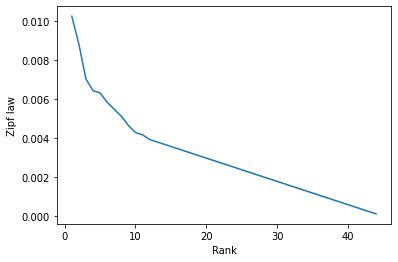

In [ ]:
sum_2017 = freq_2017.Count.sum()
sum_2017

freq_2017['Zipf law'] = freq_2017['Count']/sum_2017  # Zipf's law
freq_2017['Rank'] = freq_2017['Count'].rank(ascending=False,method='dense')  # Calculating the rank of the words based on frequency
print(freq_2017)

sns.lineplot(data = freq_2017 , x = 'Rank', y= 'Zipf law')  # Plotting

            index  Count  Zipf law  Rank
0             amp    525  0.027072   1.0
1           tesla    290  0.014954   2.0
2             car    120  0.006188   3.0
3             yes    108  0.005569   4.0
4            good    103  0.005311   5.0
...           ...    ...       ...   ...
5212       skillz      1  0.000052  68.0
5213     alarming      1  0.000052  68.0
5214  explanatory      1  0.000052  68.0
5215  surrounding      1  0.000052  68.0
5216      roaming      1  0.000052  68.0

[5217 rows x 4 columns]


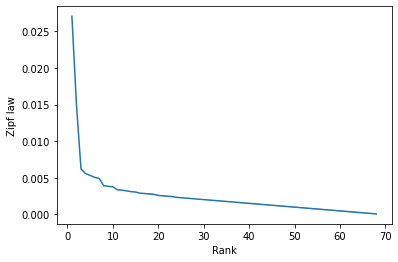

In [ ]:
sum_2018 = freq_2018.Count.sum()
sum_2018

freq_2018['Zipf law'] = freq_2018['Count']/sum_2018
freq_2018['Rank'] = freq_2018['Count'].rank(ascending=False,method='dense')
print(freq_2018)

sns.lineplot(data = freq_2018 , x = 'Rank', y= 'Zipf law')

          index  Count  Zipf law  Rank
0           amp    493  0.025145   1.0
1         tesla    257  0.013108   2.0
2           yes    154  0.007855   3.0
3         would     98  0.004998   4.0
4         great     97  0.004947   5.0
...         ...    ...       ...   ...
4884  converted      1  0.000051  72.0
4885   trickier      1  0.000051  72.0
4886     doable      1  0.000051  72.0
4887  localized      1  0.000051  72.0
4888  unwelcome      1  0.000051  72.0

[4889 rows x 4 columns]


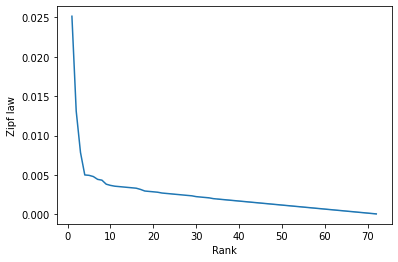

In [ ]:
sum_2019 = freq_2019.Count.sum()
sum_2019

freq_2019['Zipf law'] = freq_2019['Count']/sum_2019
freq_2019['Rank'] = freq_2019['Count'].rank(ascending=False,method='dense')
print(freq_2019)

sns.lineplot(data = freq_2019 , x = 'Rank', y= 'Zipf law')

             index  Count  Zipf law  Rank
0              amp    575  0.025624   1.0
1            tesla    189  0.008422   2.0
2              yes    160  0.007130   3.0
3            great    128  0.005704   4.0
4             much    120  0.005348   5.0
...            ...    ...       ...   ...
5507         hasty      1  0.000045  78.0
5508         fpgas      1  0.000045  78.0
5509        images      1  0.000045  78.0
5510  uncorrelated      1  0.000045  78.0
5511        carlos      1  0.000045  78.0

[5512 rows x 4 columns]


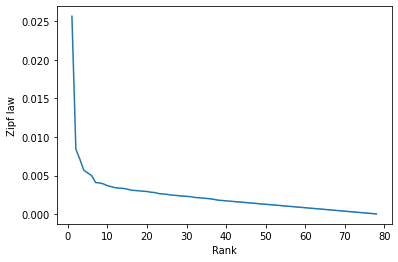

In [ ]:
sum_2020 = freq_2020.Count.sum()
sum_2020

freq_2020['Zipf law'] = freq_2020['Count']/sum_2020
freq_2020['Rank'] = freq_2020['Count'].rank(ascending=False,method='dense')
print(freq_2020)

sns.lineplot(data = freq_2020 , x = 'Rank', y= 'Zipf law')

          index  Count  Zipf law  Rank
0           amp    473  0.023615   1.0
1         tesla    208  0.010384   2.0
2         great    102  0.005092   3.0
3          good     98  0.004893   4.0
4          much     93  0.004643   5.0
...         ...    ...       ...   ...
4987  retrained      1  0.000050  74.0
4988     tuning      1  0.000050  74.0
4989    overfit      1  0.000050  74.0
4990   nothings      1  0.000050  74.0
4991  surviving      1  0.000050  74.0

[4992 rows x 4 columns]


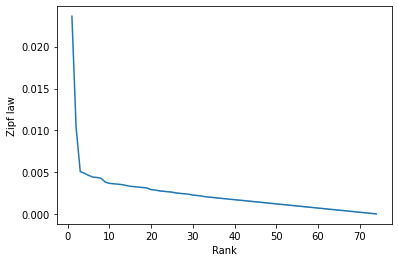

In [ ]:
sum_2021 = freq_2021.Count.sum()
sum_2021

freq_2021['Zipf law'] = freq_2021['Count']/sum_2021
freq_2021['Rank'] = freq_2021['Count'].rank(ascending=False,method='dense')
print(freq_2021)
sns.lineplot(data = freq_2021 , x = 'Rank', y= 'Zipf law')

In [ ]:
sum_2022 = freq_2022.Count.sum()
sum_2022

freq_2022['Zipf law'] = freq_2022['Count']/sum_2022
freq_2022['Rank'] = freq_2022['Count'].rank(ascending=False,method='dense')
freq_2022

,index,Count,Zipf law,Rank
0,amp,80,0.014959,1.0
1,tesla,62,0.011593,2.0
2,people,34,0.006358,3.0
3,yes,32,0.005984,4.0
4,one,30,0.005610,5.0
...,...,...,...,...
1474,threat,2,0.000374,18.0
1475,fine,2,0.000374,18.0
1476,reason,2,0.000374,18.0
1477,federal,2,0.000374,18.0


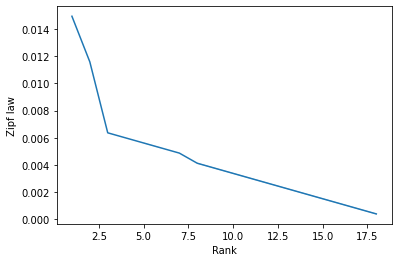

In [ ]:
sns.lineplot(data = freq_2022 , x = 'Rank', y= 'Zipf law')

In [ ]:
#df_tweet_dup.to_csv(r'data_22_test.csv', index=False)

5) Bigram Network Graphs


In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx